# Group members

- Jaime Mendoza
- Felipe Robalino
- Juan Miño
- Oscar Albuja

# C_ABET Monte Carlo Integration

## 1. Objective

The following practical exercise to be carried out, aims to implement a numerical integration using Monte Carlo, utilizing the sampling method and the Hit and Miss method. 

## 2. Introduction to Monte Carlo Integration

Monte Carlo integration is a widely used statistical simulation technique. It uses random sampling to estimate values and analyze associated uncertainty. In Monte Carlo, a phenomenon or process is simulated repeatedly by generating random numbers that represent possible variations or uncertainties in the data. These random samples are used to calculate statistics, perform simulations, and estimate unknown values.

In the context of this exercise, Monte Carlo is being used to calculate the area of a complex figure whose analitical result is far more complex. This exercise will apply different methods (Hit and Miss and Sampling method) in order to calculate the area of a given figure, comparing it to the analitical result, and comparing the methods themselves. 

## 3. Introduction to the Hit and Miss method

The Hit and Miss method estimates the area of a geometric figure by generating random points within a reference area and evaluating whether each point falls inside or outside the figure. Points are generated within the reference area using random number generation methods. The inclusion-exclusion condition is applied to determine if each point is inside or outside the figure.

The proportion of points inside the figure is used to estimate its area. This proportion is multiplied by the area of the reference square to obtain the estimated area of the figure. The accuracy of the estimation depends on the number of points generated, with a higher number of points providing a more precise estimate, like in the example provided in the figure below: 



<img src="images/image-20230517-205046.png" alt="Hit and Miss Example" width="50%"/>

## 4. Introduction to the Sampling method

The Sampling method estimates the area of a figure of interest by generating random points within it and using numerical integration. Unlike the Hit and Miss method, which uses random points in a reference area, Sampling focuses solely on the figure of interest. Random points are uniformly distributed within the figure's boundaries, and a numerical integration method subdivides the figure into smaller elements to calculate their areas. By utilizing only points generated within the figure and considering its geometry, Sampling provides a more precise estimation compared to Hit and Miss. Additionally, it is computationally efficient as it avoids generating a large number of points outside the figure, resulting in reduced execution time and improved efficiency in area calculation.

## 5. Instructions for the exercise
**Main goal:** Calculate the area between the circles in the graph shown (colored in blue), using the Monte Carlo methods mentioned in the objective: 

<img src="images/image-20230517-210409.png" alt="area to calculate" width="20%"/>

1. **Implement Monte Carlo integration using the sampling method.**

    - Define the appropriate functions to evaluate the integration (10%).

    - Define the appropriate integration intervals (10%).

    - Experimentally determine the sample size to be used.

    - Observe how the calculated area approaches the real area based on the sample size (10%).

    - Report your findings in a table and graphically (20%).

2. **Implement Monte Carlo integration using the Hit and Miss method.**

    - Define the appropriate "board" for throwing the "darts". In other words, define the appropriate limits in X and Y to generate uniformly distributed random points (10%).

    - Define a criterion for determining whether the "darts" fall within the area of interest (10%).

    - Observe how the calculated area approaches the real area based on the number of generated "darts" (10%).

    - Report your experiments in a table and graphically (20%).



## 6.1. Exercise development: HIT AND MISS METHOD

In [1]:
# Importing necessary libraries:
# - numpy: for efficient numerical operations
# - matplotlib.pyplot: for creating plots and visualizations
# - math: for additional mathematical functions
# - tqdm, trange: for displaying progress bars in loops

import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm, trange
import json

#### For this exercise, we first define the functions for checking if a point is inside or outside the desired figure (along with the theoretical area):

In [2]:
# Define a function to calculate the y-coordinate of a point on a circle
def circle(r, x, h, k, how):
    if how == 'n':
        return -math.sqrt(r**2 - (x-h)**2) + k
    if how == 'p':
        return math.sqrt(r**2 - (x-h)**2) + k
    else:
        raise ValueError("how must be 'n' or 'p'")

# Define a function to check if a point is inside or on the boundary of a circle
def in_Fig(x, y, radio):
    fig_in = []
    
    if math.sqrt(x**2 + y**2) <= radio:
        fig_in.append(True)
    else:
        fig_in.append(False)

    if math.sqrt((x-radio)**2 + y**2) <= radio:
        fig_in.append(True)
    else:
        fig_in.append(False)

    if math.sqrt(x**2 + (y-radio)**2) <= radio:
        fig_in.append(True)
    else:
        fig_in.append(False)

    if math.sqrt((x-radio)**2 + (y-radio)**2) <= radio:
        fig_in.append(True)
    else:
        fig_in.append(False)

    return all(fig_in)

# Calculate the theoretical area of the figure
def theoretical_area(radio):
    return radio**2 * (1 + math.pi/3 - math.sqrt(3))

# Calculate the theoretical area with a given radius
tharea = theoretical_area(20)

#### In this part we get the desired coordinates for the dots to be plotted on the canvas that contains the figure using lambda functions that calculate the y-coordinates for every x-coordinate:

In [3]:
radio = 20
mag = 100

# Create a figure for plotting
fig = plt.figure(figsize=(5, 5))

# Generate x-values for the circles
x = np.linspace(0, 20, num=radio * mag)

# Define lambda functions to calculate y-coordinates of points on the circles
circle_ = lambda r, x: circle(r, x, 0, 0, 'p')
circle_x = lambda r, x: circle(r, x, r, 0, 'p')
circle_y = lambda r, x: circle(r, x, 0, r, 'n')
circle_xy = lambda r, x: circle(r, x, r, r, 'n')

# Calculate the y-coordinates for each circle
circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]

<Figure size 500x500 with 0 Axes>

#### In this block, we finally plot the figure and the dots that represent the coordinates that were calculated before. The dots that land inside the figure are colored in teal, while the ones that landed on the outside are colored in indianred. The experimental area is also calculated and shown on top of the graph.

100%|██████████| 100000/100000 [00:00<00:00, 562202.21it/s]


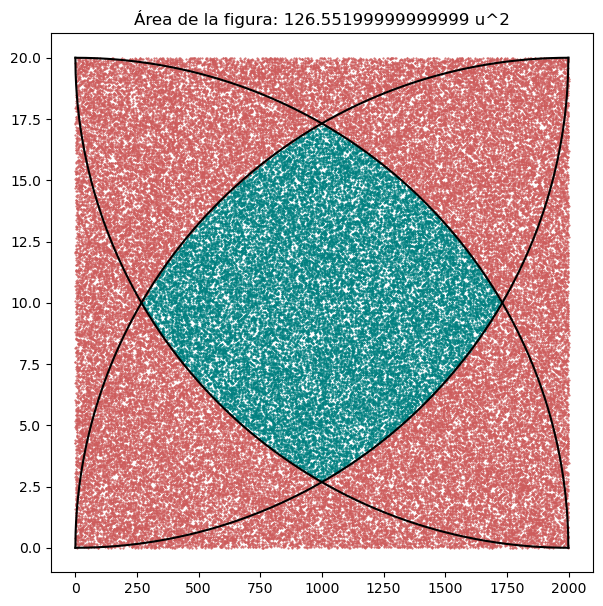

In [4]:
points = 100000

# Generate random x and y coordinates within the given range
xs, ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
points_in, xv, yv = [], [], []

# Iterate over the generated points and check if they are inside the figure
for x, y in tqdm(zip(xs, ys), total=points):
    if in_Fig(x, y, radio):
        points_in.append(True)
    else:
        points_in.append(False)
    xv.append(x)
    yv.append(y)

xv, yv = np.array(xv), np.array(yv)

# Create a figure for plotting
fig = plt.figure(figsize=(7, 7))

# Get the indices of points inside and outside the figure
dentro = np.where(points_in)[0]
fuera = np.where(np.logical_not(points_in))[0]

# Plot the points inside and outside the figure
plt.plot(xv[dentro] * mag, yv[dentro], 'o', color='teal', markersize=0.5)
plt.plot(xv[fuera] * mag, yv[fuera], 'o', color='indianred', markersize=0.5)

# Plot the circles
plt.plot(circle1, color='black')
plt.plot(circle2, color='black')
plt.plot(circle3, color='black')
plt.plot(circle4, color='black')

# Calculate the percentage of points inside the figure and estimate the area
in_prctg = len(dentro) / points
area = radio**2 * in_prctg

plt.title(f'Área de la figura: {area} u^2')

# Display the figure
plt.show()


## 6.2. Exercise development: SAMPLING METHOD.

#### For this sampling method what is done here is first a definition of a certain ammount of x values. With those values, the circles can be plotted. Is it important to have in mind that in this exercise only half the figure is used during the calculations, for the final area, the area of half the figure is duplicated. 

After plotting the circles, the limits of the figure are defined between 10 and b (the intersection between both circles). 

With these limits, the size of a set of sample values is defined and the total width of the figure is divided by the ammount of sample values to get each individual width. 

Finally, a set of random numbers is generated with which the height of said points is calculated, then multiplied by the width to get the area of each individual sample, and then added to get the estimated area of the figure. 

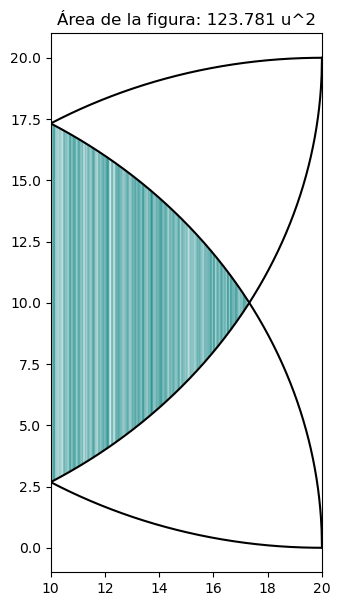

In [5]:
# Define the range
a, b = 0, 20

# Create a figure
fig = plt.figure(figsize=(3.5, 7))

# Generate x values
x = np.linspace(a, b, num=1500)

# Calculate y values for each circle
circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]

# Set the x-axis limits
plt.xlim(10, radio)

# Find the intersection point between circle1 and circle3
b = x[np.where(np.round(circle1, 2) == np.round(circle3, 2))[0][0]]

# Update the starting point
a = 10

# Set the number of samples
n = 1000

# Calculate the width for each sample
width = (b - a) / n

# Generate random x values within the range
xi_random = np.random.random(size=n) * (b - a) + a

# Calculate y values for each random x value
circle1_r = [circle_(radio, x) for x in xi_random]
circle3_r = [circle_y(radio, x) for x in xi_random]

# Plot vertical lines connecting circle3_r and circle1_r
plt.vlines(xi_random, circle3_r, circle1_r, colors='teal', linewidth=0.1)

# Calculate the height of each segment
height = np.array(circle1_r) - np.array(circle3_r)

# Calculate the area by summing up the areas of all segments
area = np.sum(height * width) * 2

# Set the title of the plot
plt.title(f'Área de la figura: {round(area, 4)} u^2')

# Plot the circles
plt.plot(x, circle1, color='black')
plt.plot(x, circle3, color='black')
plt.plot(x, circle2, color='black')
plt.plot(x, circle4, color='black')

## 6.3. Exercise development: FUNCTIONS DEFINITION

#### In this section, the above examples are summarized in functions hit_and_miss and samplig so that a set of simulations can be run in order to get a complete overview of theses methods. 

In [6]:
# Function to estimate the area using the hit-and-miss method
def hit_and_miss(radio=20, points=1_000_000):
    # Generate random x and y values within the given range
    xs, ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
    points_in, xv, yv = [], [], []

    # Check if each point is inside the figure or not
    for x, y in zip(xs, ys):
        if in_Fig(x, y, radio):
            points_in.append(True)
        else:
            points_in.append(False)
        xv.append(x)
        yv.append(y)

    xv, yv = np.array(xv), np.array(yv)

    # Find the indices of points inside and outside the figure
    dentro = np.where(points_in)[0]
    fuera = np.where(np.logical_not(points_in))[0]

    # Calculate the ratio of points inside the figure
    in_prctg = len(dentro) / points

    # Calculate the estimated area based on the ratio
    area = radio ** 2 * in_prctg

    return area


# Function to estimate the area using the sampling method
def sampling(radio=20, n=1_000_000):
    a, b = 0, radio
    x = np.linspace(a, b, num=1500)

    # Calculate y values for each circle
    circle1 = [circle_(radio, x) for x in x]
    circle3 = [circle_y(radio, x) for x in x]

    # Find the intersection point between circle1 and circle3
    b = x[np.where(np.round(circle1, 2) == np.round(circle3, 2))[0][0]]
    a = radio / 2

    # Calculate the width for each sample
    width = (b - a) / n

    # Generate random x values within the range
    xi_random = np.random.random(size=n) * (b - a) + a

    # Calculate y values for each random x value
    circle1_r = [circle_(radio, x) for x in xi_random]
    circle3_r = [circle_y(radio, x) for x in xi_random]

    # Calculate the height of each segment
    height = np.array(circle1_r) - np.array(circle3_r)

    # Calculate the estimated area by summing up the areas of all segments
    area = np.sum(height * width) * 2

    return area

## 6.4. Excerise development: FINAL ANALYSIS

In order to prove if the simulations match the analysis, the analytical calculations are provided: 

According to PRESH TALWALKAR in his/her blog: mind your desicions, the area of the colored figure can be calculated by dividing the figure in parts and performing certain calculations with those parts as follows: 

##### First the figure gets divided into labeled parts: r, a, b and c:

<!-- ![Picture title](image-20230517-213510.png) -->
<img src="images/image-20230517-213510.png" alt="drawing" width="20%"/>

##### With these divisions the following equation for the area arises: 

$4a + 4b + c = r^2$

##### Next up, one can calculate the area of a quarter of circle: 


<!-- ![Picture title]() -->
<img src="images/image-20230517-213715.png" alt="drawing" width="20%"/>

##### From where the following equation is obtained: 

$$2a + 3b + c = \frac{\pi r^2}{4}$$

##### With those two equations in mind, there is only one equation left in order to get a complete set of three equations for three variables: 


<img src="images/image-20230517-213934.png" alt="drawing" width="20%"/>

##### From this figure, using the radius as follows, the area can be calculated and set up in terms of a, b and c: 

<!-- ![Picture title](image-20230517-214125.png) -->
<img src="images/image-20230517-214125.png" alt="fig" width="50%">

##### Which gives the third and last equation: 

$a + 2b + c = \frac{\pi r^2}{3} - \frac{r^2\sqrt{3}}{4}$

##### With which the area can be solved, solving for c: 

$c = r^2(1 + \frac{\pi}{3} - \sqrt{3})$

wich for a radius = 20: 

$c \approx 126.06$


### Now for the simulations, five sets of 5,000 iterations each are going to be simulated, each set with a different ammount of random points or lines, depending on the method. 

In [8]:
# List of iterations to perform
iterations = [10, 100, 1_000, 10_000, 100_000]

# Number of iterations for each experiment
n = 5000

# Lists to store the average areas for hit-and-miss and sampling methods
hm_areas, s_areas = [], []

# Perform experiments for each iteration
for iteration in iterations:
    # Lists to store the areas for each iteration
    hm_mean, s_mean = [], []

    # Perform n iterations of hit-and-miss and sampling methods
    for _ in trange(n):
        # Estimate area using hit-and-miss method and append to list
        hm_mean.append(hit_and_miss(points=iteration))

        # Estimate area using sampling method and append to list
        s_mean.append(sampling(n=iteration))

    # Calculate the average area for hit-and-miss method and append to list
    hm_areas.append(np.mean(hm_mean))

    # Calculate the average area for sampling method and append to list
    s_areas.append(np.mean(s_mean))

100%|██████████| 10/10 [00:02<00:00,  3.66it/s]


In [7]:
areas_json = json.load(open('areas.json', 'r'))
simulation = str(9)
hm_areas, s_areas = areas_json['4'][0], areas_json['9'][1]

### With the simulations performed, now the absolute difference between the theoretical estimated area and the simluated estimated area is going to be calculated for each method, in each set of values. 

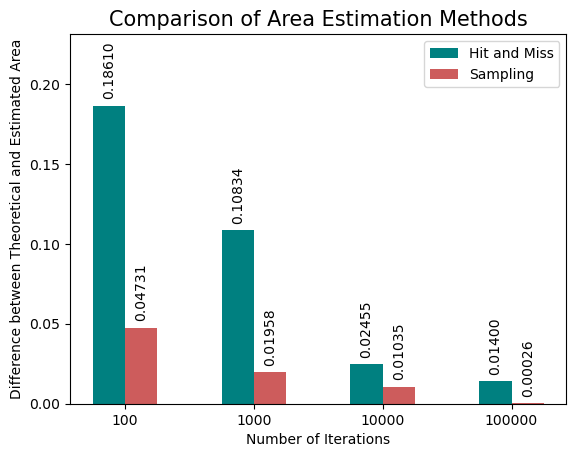

In [11]:
iterations = [10, 100, 1_000, 10_000 ,100_000] # "iterations" are points for hit and miss and rectangles for sampling methods

# Calculate the absolute difference between theoretical area and estimated area for hit-and-miss method
hm_diff = [abs(tharea - area) for area in hm_areas]

# Calculate the absolute difference between theoretical area and estimated area for sampling method
s_diff = [abs(tharea - area) for area in s_areas]

# Remove the first element from each list
hm_diff = hm_diff[1:]
s_diff = s_diff[1:]
iterations = iterations[1:]

# Convert iterations to strings for plotting
x_ = np.array(iterations).astype(str)

# Create a dictionary to store the mean differences for each method
area_means = {
    'Hit and Miss': hm_diff,
    'Sampling': s_diff
}

# Define the colors for the bars
colors = ['teal', 'indianred']

# Create an array of indices for the x-axis
x = np.arange(len(x_))

# Set the width of the bars
width = 0.25

# Initialize a multiplier for offsetting the bars
multiplier = 0

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Iterate over the area_means dictionary
for attribute, measurement in area_means.items():
    # Calculate the offset for each bar group
    offset = width * multiplier
    
    # Create the bars and assign labels
    rects = ax.bar(x + offset + 0.125, measurement, width, label=attribute, color=colors[multiplier])
    
    # Add labels to the bars
    ax.bar_label(rects, padding=5, rotation=90, fontsize=10, fmt='%.5f')
    
    # Increment the multiplier
    multiplier += 1

# Set the x-ticks and labels
ax.set_xticks(x + width, x_, minor=False)

# Add a legend
ax.legend()

# Set the y-axis limit based on the maximum difference
y_max = max(max(hm_diff), max(s_diff))
plt.ylim(0, y_max + 0.045)

# Set the plot title and axis labels
ax.set_title("Comparison of Area Estimation Methods", fontsize=15)
ax.set_ylabel("Difference between Theoretical and Estimated Area")
ax.set_xlabel("Number of Iterations")

# Display the plot
plt.show()

## 7. Results
The results of the simulation above are stored in a [Json File](areas.json) in this directory. The results are shown in the following table:



In [9]:

from IPython.display import display, Markdown
import pandas as pd

data = pd.read_json('areas.json')
data = data.transpose()
hm_df = data[[0]]
sp_df = data[[1]]

hm_table = hm_df.astype(str)[0].str.strip('[]').str.split(',', expand=True).astype(float)
hm_table.columns = ['10', '100', '1000', '10000', '100000']
hm_table.index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

sp_table = sp_df.astype(str)[1].str.strip('[]').str.split(',', expand=True).astype(float)
sp_table.columns = ['10', '100', '1000', '10000', '100000']
sp_table.index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

md_table = pd.concat([hm_table, sp_table], axis=1, keys=['Hit and Miss', 'Sampling']).to_markdown()

display(Markdown(f'{md_table}'))

|    |   ('Hit and Miss', '10') |   ('Hit and Miss', '100') |   ('Hit and Miss', '1000') |   ('Hit and Miss', '10000') |   ('Hit and Miss', '100000') |   ('Sampling', '10') |   ('Sampling', '100') |   ('Sampling', '1000') |   ('Sampling', '10000') |   ('Sampling', '100000') |
|---:|-------------------------:|--------------------------:|---------------------------:|----------------------------:|-----------------------------:|---------------------:|----------------------:|-----------------------:|------------------------:|-------------------------:|
|  1 |                  126.624 |                   125.436 |                    126.037 |                     126.038 |                      126.053 |              126.22  |               126.011 |                126.071 |                 126.056 |                  126.06  |
|  2 |                  126.416 |                   126.102 |                    126.053 |                     126.107 |                      126.055 |              125.78  |               125.964 |                126.031 |                 126.058 |                  126.059 |
|  3 |                  125.608 |                   125.966 |                    126.024 |                     126.015 |                      126.073 |              126.191 |               126.072 |                126.059 |                 126.058 |                  126.054 |
|  4 |                  124.944 |                   125.701 |                    125.937 |                     126.061 |                      126.069 |              125.836 |               126.195 |                126.104 |                 126.059 |                  126.061 |
|  5 |                  126.016 |                   126.245 |                    126.167 |                     126.034 |                      126.045 |              125.854 |               125.891 |                126.072 |                 126.039 |                  126.057 |
|  6 |                  128.112 |                   125.598 |                    126.106 |                     126.014 |                      126.061 |              126.195 |               125.935 |                126.058 |                 126.062 |                  126.058 |
|  7 |                  125.016 |                   126.286 |                    126.036 |                     126.083 |                      126.058 |              126.083 |               126.1   |                126.044 |                 126.067 |                  126.057 |
|  8 |                  125.544 |                   126.024 |                    126.145 |                     126.047 |                      126.069 |              126.156 |               126.007 |                126.042 |                 126.061 |                  126.057 |
|  9 |                  125.816 |                   126.122 |                    126.133 |                     126.084 |                      126.048 |              125.954 |               126.134 |                126.078 |                 126.062 |                  126.055 |
| 10 |                  125.992 |                   126.162 |                    125.866 |                     126.052 |                      126.065 |              125.663 |               126.011 |                126.039 |                 126.069 |                  126.058 |

The table rows represents the each of the 10 simulations performed, and the columns represent the numbers of rectangles or points for each method

## 8. Discussion/Conclusion 

**Comparison of Hit and Miss and Sampling Methods:**

- Precision: The Sampling method tends to provide more accurate estimates as it generates points within the area of interest and utilizes numerical integration methods to calculate the area. In contrast, the Hit and Miss method can yield less precise estimates by including points both inside and outside the figure.

- Efficiency: The Sampling method is generally more efficient in terms of computational resources, as it generates random points exclusively within the area of interest. This reduces the execution time compared to the Hit and Miss method, which may require generating a larger number of points outside the figure.

- Precision dependent on the number of generated points: The accuracy of the estimation is related to the number of generated points. Increasing the number of points improves precision but also requires more computational time.

- Influence of random distribution: Accuracy can be affected by the randomly generated point distribution. Advanced techniques may be required to ensure proper distribution and avoid biases.

- Limitations of numerical integration: In the Sampling method, precision may depend on the choice of numerical integration method used to calculate the area. Some methods may not be suitable for figures with irregular or complicated geometry.

In summary, the Sampling method offers greater precision and efficiency compared to the Hit and Miss method in estimating areas. However, limitations of the Monte Carlo method, such as the dependence on the number of generated points and sensitivity to random distribution and the complexity of the figure of interest, should be considered.

**Comparison of Hit and Miss and Sampling Methods according to the simulation results:**

Acoording to the graph, the size of the set of data used for both methods affects the precision of the experiment. The bigger the data size, the better the results, meaning, closer to the analytical answer. Nevertheless, with the sampling method, one can achieve lower levels of errors quicker than with the hit and miss method. This happens due to the theoretical conclusion provided above which states that the Sampling method tends to provide more accurate estimates as it generates points within the area of interest and utilizes numerical integration methods to calculate the area. The area of the figure with both method can be obtained with absolute errors below 0.001 with iterations above 100,000. 

## 9. Referencias
Pérez, P., & Valente, M. (2018). Aplicación de la técnica de simulación Monte Carlo. En Manual de Simulación: Métodos y Aplicaciones (Capítulo 6). Recuperado de https://www.famaf.unc.edu.ar/~pperez1/manuales/cim/cap6.html
Illana, J. I. (2013). Métodos Monte Carlo. Recuperado de https://www.ugr.es/~jillana/Docencia/FM/mc.pdf 